# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Profanity** - Profanity refers to language that is considered vulgar, offensive, or socially unacceptable in certain contexts. It often includes swear words, curse words, and other forms of explicit language that may be considered inappropriate or offensive to some people

### Assignments 1: 
#### Find Most Common Words and create word cloud.

#### Read in the document-term matrix

In [116]:
import pickle
file_path = 'dtm2.pkl'

# Read the pickled data
with open(file_path, 'rb') as f:
    dtm_df = pickle.load(f)
    
dtm_df = dtm_df.transpose()

In [117]:
dtm_df.head()

,file1,file10,file11,file12,file13,file14,file15,file16,file17,file18,...,file38,file39,file4,file40,file41,file5,file6,file7,file8,file9
aashima,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Find  and print the top 30 words in file


In [118]:
# Find the top 30 words in each file
top_dict = {}
for c in dtm_df.columns:
    top = dtm_df[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'file1': [('research', 16),
  ('age', 14),
  ('students', 9),
  ('doctoral', 8),
  ('jrf', 7),
  ('fellowship', 6),
  ('india', 5),
  ('people', 4),
  ('phd', 4),
  ('limit', 4),
  ('additional', 3),
  ('need', 3),
  ('funding', 3),
  ('restrictions', 3),
  ('significant', 3),
  ('nrf', 3),
  ('universities', 3),
  ('careers', 3),
  ('talent', 3),
  ('eligibility', 3),
  ('private', 2),
  ('problems', 2),
  ('union', 2),
  ('international', 2),
  ('year', 2),
  ('existing', 2),
  ('time', 2),
  ('issue', 2),
  ('issues', 2),
  ('looking', 2)],
 'file10': [('hindi', 17),
  ('english', 11),
  ('students', 10),
  ('language', 9),
  ('mbbs', 8),
  ('books', 6),
  ('medical', 6),
  ('medium', 5),
  ('medicine', 5),
  ('new', 5),
  ('background', 4),
  ('scientific', 4),
  ('doctors', 4),
  ('evidence', 3),
  ('pradesh', 3),
  ('journals', 3),
  ('delhi', 3),
  ('regardless', 3),
  ('conferences', 3),
  ('topic', 3),
  ('training', 3),
  ('schooling', 3),
  ('modern', 3),
  ('political', 3)

In [119]:
# Print the top 15 words in each file
for file, top_words in top_dict.items():
    print(file)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

file1

research, age, students, doctoral, jrf, fellowship, india, people, phd, limit, additional, need, funding, restrictions

---

file10

hindi, english, students, language, mbbs, books, medical, medium, medicine, new, background, scientific, doctors, evidence

---

file11

students, education, suicide, suicides, social, educational, government, india, number, student, economic, including, country, society

---

file12

time, knowledge, classrooms, fractions, learning, school, slow, schools, rushing, students, instead, teachers, quality, rushed

---

file13

students, gender, spaces, science, hostels, iiser, hostel, segregation, wire, institute, mohali, women, institutes, said

---

file14

ai, using, students, student, program, use, writing, like, write, papers, academic, text, assignments, plagiarism

---

file15

science, scientists, people, scholars, censorship, paper, scientific, really, theyre, going, peer, dont, work, thats

---

file16

sahara, ice, humid, years, earths, clim

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [120]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print(list(stop_words)[0:50])

['same', 'down', 'few', 'but', 'with', 'i', 'and', 'as', 'now', 'whom', 'does', 'd', 'about', 'shouldn', 'weren', 'so', 'him', 'my', 'for', 'can', 'once', "needn't", 't', "don't", "mightn't", 're', 'ourselves', 'wasn', 'on', 'only', 'his', 'be', 'she', 'doing', 'myself', 'been', 'hadn', 'nor', 'further', 'here', "couldn't", 'needn', 'where', "isn't", 'then', 'll', 'couldn', 'don', 'haven', 'below']


#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [121]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each file
words = []
for file in dtm_df.columns:
    top = [word for (word, count) in top_dict[file]]
    for t in top:
        words.append(t)

words

['research',
 'age',
 'students',
 'doctoral',
 'jrf',
 'fellowship',
 'india',
 'people',
 'phd',
 'limit',
 'additional',
 'need',
 'funding',
 'restrictions',
 'significant',
 'nrf',
 'universities',
 'careers',
 'talent',
 'eligibility',
 'private',
 'problems',
 'union',
 'international',
 'year',
 'existing',
 'time',
 'issue',
 'issues',
 'looking',
 'hindi',
 'english',
 'students',
 'language',
 'mbbs',
 'books',
 'medical',
 'medium',
 'medicine',
 'new',
 'background',
 'scientific',
 'doctors',
 'evidence',
 'pradesh',
 'journals',
 'delhi',
 'regardless',
 'conferences',
 'topic',
 'training',
 'schooling',
 'modern',
 'political',
 'set',
 'curriculum',
 'aiims',
 'publications',
 'teachers',
 'anecdotal',
 'students',
 'education',
 'suicide',
 'suicides',
 'social',
 'educational',
 'government',
 'india',
 'number',
 'student',
 'economic',
 'including',
 'country',
 'society',
 'structure',
 'crisis',
 'family',
 'policy',
 'indian',
 'youth',
 'rising',
 'jobs',
 'pe

In [122]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('research', 13),
 ('students', 13),
 ('like', 12),
 ('researchers', 12),
 ('people', 11),
 ('time', 9),
 ('new', 9),
 ('university', 9),
 ('work', 8),
 ('years', 8),
 ('india', 7),
 ('student', 7),
 ('said', 7),
 ('need', 6),
 ('evidence', 6),
 ('education', 6),
 ('science', 6),
 ('scientists', 6),
 ('technology', 6),
 ('health', 6),
 ('scientific', 5),
 ('indian', 5),
 ('public', 5),
 ('international', 4),
 ('way', 4),
 ('institute', 4),
 ('women', 4),
 ('climate', 4),
 ('scholars', 4),
 ('make', 4),
 ('disease', 4),
 ('dna', 4),
 ('human', 4),
 ('says', 4),
 ('world', 4),
 ('centre', 4),
 ('study', 4),
 ('studies', 4),
 ('pandemic', 4),
 ('data', 4),
 ('light', 4),
 ('global', 4),
 ('brain', 4),
 ('phd', 3),
 ('problems', 3),
 ('year', 3),
 ('language', 3),
 ('teachers', 3),
 ('social', 3),
 ('number', 3),
 ('including', 3),
 ('policy', 3),
 ('learning', 3),
 ('iiser', 3),
 ('use', 3),
 ('professor', 3),
 ('change', 3),
 ('paper', 3),
 ('dont', 3),
 ('just', 3),
 ('sun', 3),
 ('mil

#### If more than half of the files have it as a top word, exclude it from the list


In [123]:
# If more than half of the files have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 20]
add_stop_words

[]

In [124]:
# Let's update our document-term matrix with the new list of stop words
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean2.pkl')

# Add new stop words
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)  that is empty is our case
stop_words = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")
data_stop

,aashima,abbas,abdul,abha,abhay,abhigyan,abhijit,abhishek,abigail,abilash,...,zealands,zeroes,zerosum,zika,zombie,zoom,zurbuchen,¹⁵,¹⁸,āwe
file1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
file16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Assuming you have cleaned data stored in a variable called 'cleaned_data'
cleaned_data = pd.read_pickle('dtm_stop.pkl')

# Add new stop words
additional_stop_words = ['a', 'about', 'above', 'across', 'after', 'again', 'against', 'ain', 'all', 'almost',
                        'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'an', 'and',
                        'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'aren', "aren't",
                        'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both',
                        'but', 'by', 'can', 'cannot', 'could', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't",
                        'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few',
                        'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
                        "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how',
                        'however', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just',
                        'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself',
                        'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or',
                        'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own','same', 'shan', "shan't",
                        'she', "she's", 'should', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll",
                        'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this',
                        'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't",
                        'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                        'why', 'will', 'with', 'won', "won't", 'would', 'wouldn', "wouldn't", 'y', 'you', "you'd",
                        "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'couldn', 'aren',
                        "aren't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
                        "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
                        'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't"]
  # Replace with your list of additional stop words
stop_words = list(additional_stop_words)

# Recreate document-term matrix
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(cleaned_data)

# Pickle it for later use
with open('dtm_updated.pkl', 'wb') as f:
    pickle.dump((vectorizer, dtm), f)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're'] not in stop_words.

  warnings.warn(


In [126]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [127]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


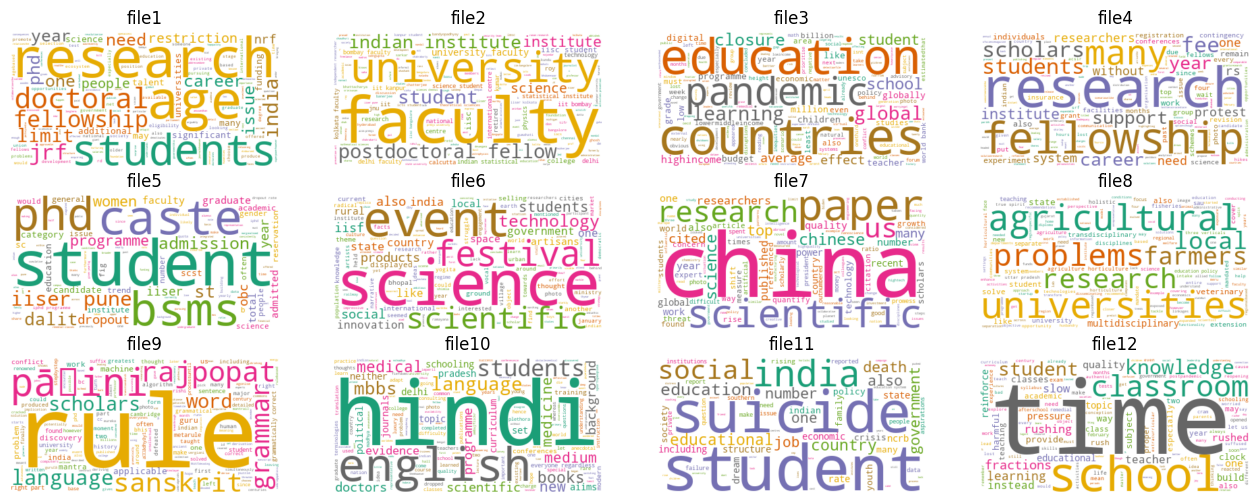

In [128]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['file' + str(i) for i in range(1, 13)]

# Create subplots for each file
index = 0
for file in full_names:
    wc.generate(data_clean.transcript[file])
    plt.subplot(3, 4, index+1)
    index = index+1
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(file)

plt.show()

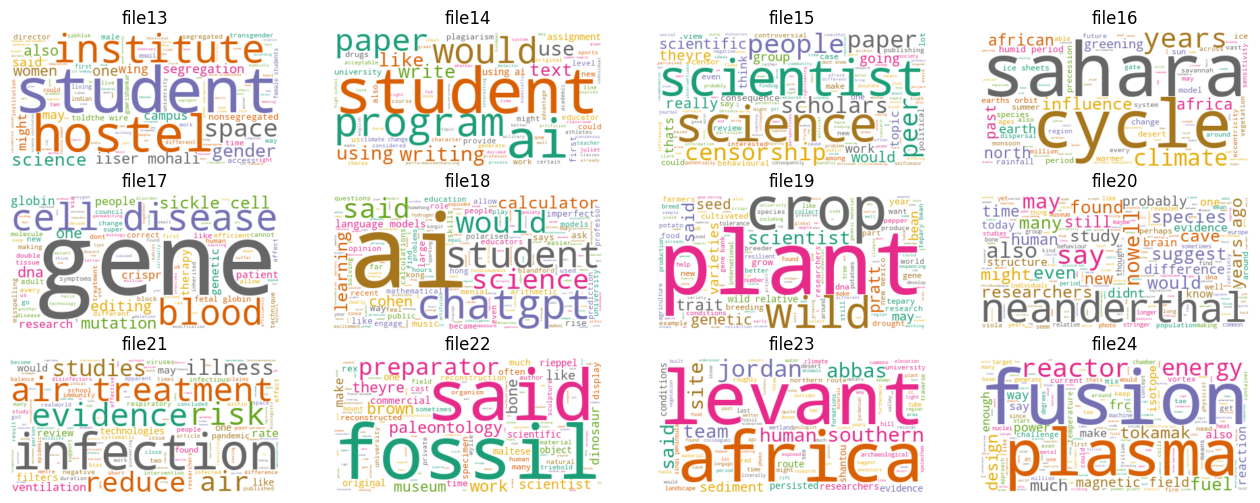

In [129]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['file' + str(i) for i in range(13, 25)]

# Create subplots for each file
index = 0
for file in full_names:
    wc.generate(data_clean.transcript[file])
    plt.subplot(3, 4, index+1)
    index = index+1
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(file)

plt.show()

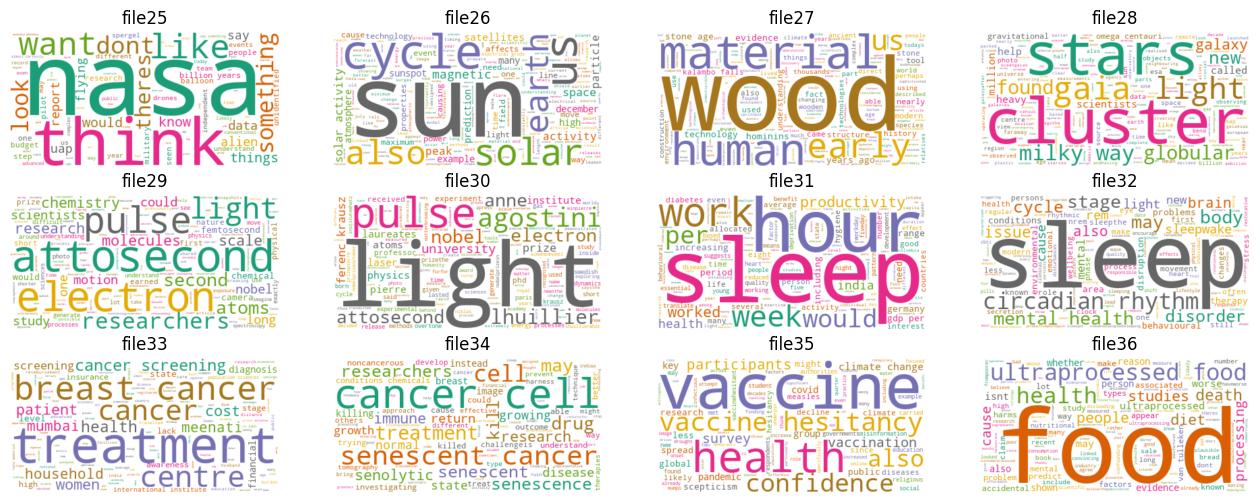

In [130]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['file' + str(i) for i in range(25, 37)]

# Create subplots for each file
index = 0
for file in full_names:
    wc.generate(data_clean.transcript[file])
    plt.subplot(3, 4, index+1)
    index = index+1
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(file)

plt.show()

#### You observations
1. Multiple files from file 1 to file 14 have common students or student, faculty, science, paper, research and fellowship.
2. In file1 word research is most repeated, in file7 china and paper is most repeated and in file 12 word time is most repeated.
3. In files 27 to 41, multiple words are repeated in the file but common one are sleep in file 31 and 32, health in file 35 and 36.

### Assignment 2:
#### Find the number of unique words that each file uses.

In [131]:
# Calculate the word count for each word
word_count = dtm_df.sum(axis=1)

# Create a new DataFrame from word count
word_count_df = pd.DataFrame(word_count, columns=['count'])

# Sort the DataFrame by word count in descending order
word_count_df = word_count_df.sort_values(by='count', ascending=False)
word_count_df.head()

,count
faculty,293
students,204
university,189
student,167
science,166


In [132]:
# Calculate the word count for each file
word_count2 = dtm_df.sum(axis=0)

# Create a new DataFrame from word count
word_count_df2 = pd.DataFrame(word_count2, columns=['count'])

# Sort the DataFrame by word count in descending order
word_count_df2 = word_count_df2.sort_values(by='count', ascending=False)
word_count_df2.head()

,count
file2,3345
file13,2225
file24,1861
file19,1518
file5,1330


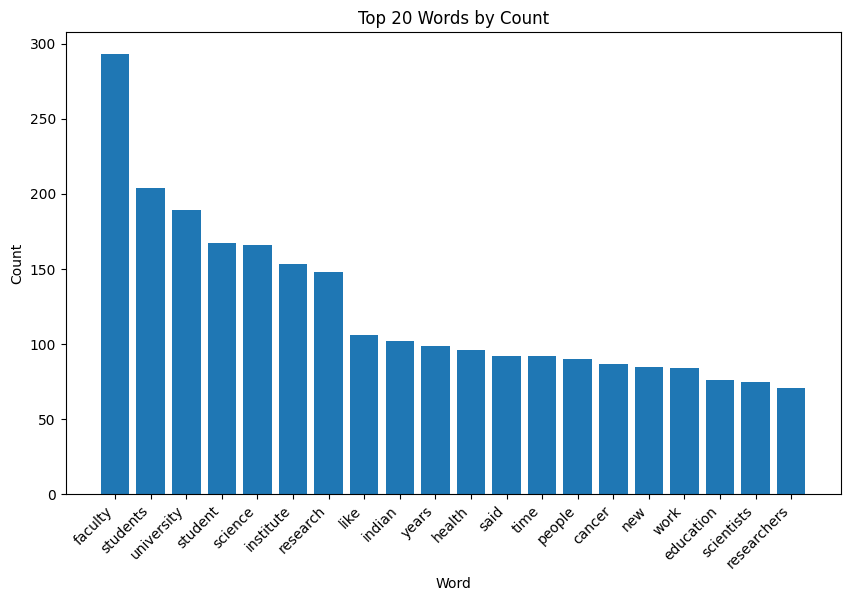

In [133]:
import matplotlib.pyplot as plt

# Plot the word count for each word
plt.figure(figsize=(10, 6))
plt.bar(word_count_df.index[:20], word_count_df['count'][:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 20 Words by Count')
plt.show()


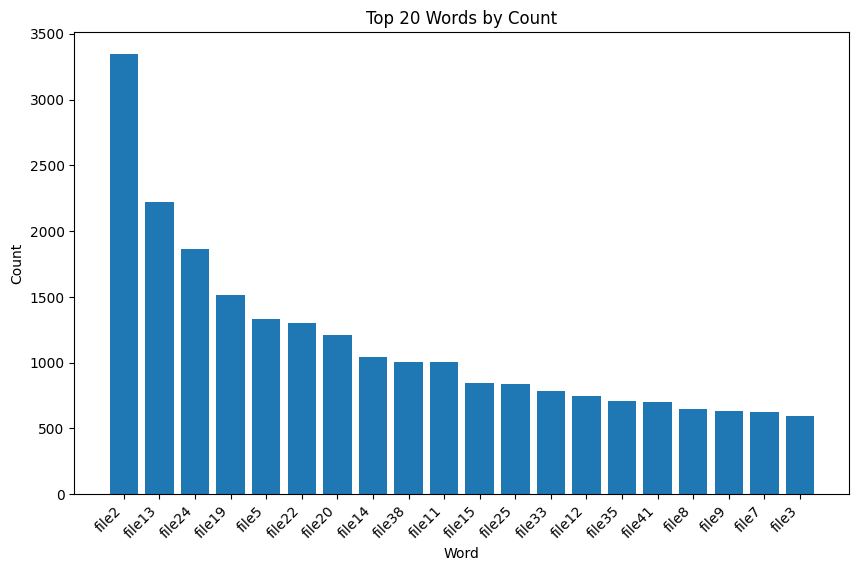

In [134]:
import matplotlib.pyplot as plt

# Plot the word count for each word
plt.figure(figsize=(10, 6))
plt.bar(word_count_df2.index[:20], word_count_df2['count'][:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 20 Words by Count')
plt.show()


#### Findings
   * File2 and File 13 have a lot of words(greater than 2000).
   * Multiple files have words less than 1000 i.e file no = 15,25,33,12,35,41,8,9,7,3
   * Most repeated word in whole corpus is faculty, students, student, institute and university(having words more than 150).

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like suicide, depression, anxiety, harrassment etc.

In [135]:
# take a look at the most common words.
Counter(words).most_common()

[('research', 13),
 ('students', 13),
 ('like', 12),
 ('researchers', 12),
 ('people', 11),
 ('time', 9),
 ('new', 9),
 ('university', 9),
 ('work', 8),
 ('years', 8),
 ('india', 7),
 ('student', 7),
 ('said', 7),
 ('need', 6),
 ('evidence', 6),
 ('education', 6),
 ('science', 6),
 ('scientists', 6),
 ('technology', 6),
 ('health', 6),
 ('scientific', 5),
 ('indian', 5),
 ('public', 5),
 ('international', 4),
 ('way', 4),
 ('institute', 4),
 ('women', 4),
 ('climate', 4),
 ('scholars', 4),
 ('make', 4),
 ('disease', 4),
 ('dna', 4),
 ('human', 4),
 ('says', 4),
 ('world', 4),
 ('centre', 4),
 ('study', 4),
 ('studies', 4),
 ('pandemic', 4),
 ('data', 4),
 ('light', 4),
 ('global', 4),
 ('brain', 4),
 ('phd', 3),
 ('problems', 3),
 ('year', 3),
 ('language', 3),
 ('teachers', 3),
 ('social', 3),
 ('number', 3),
 ('including', 3),
 ('policy', 3),
 ('learning', 3),
 ('iiser', 3),
 ('use', 3),
 ('professor', 3),
 ('change', 3),
 ('paper', 3),
 ('dont', 3),
 ('just', 3),
 ('sun', 3),
 ('mil

In [136]:
# isolate just these bad words that are abusive or depressing 
# Let's isolate just these bad words
data_bad_words = dtm_df.transpose()[['suicides', 'suicide','depression','anxiety', 'sexual','harassment','violence']]
data_profanity = pd.concat([data_bad_words.suicides + data_bad_words.suicide+data_bad_words.depression+data_bad_words.anxiety, data_bad_words.sexual+data_bad_words.harassment+data_bad_words.violence], axis=1)
data_profanity.columns = ['Depressing_word', 'Abusive_word']
data_profanity

,Depressing_word,Abusive_word
file1,0,0
file10,0,0
file11,30,0
file12,0,0
file13,2,21
file14,0,0
file15,0,0
file16,0,0
file17,0,0
file18,1,0


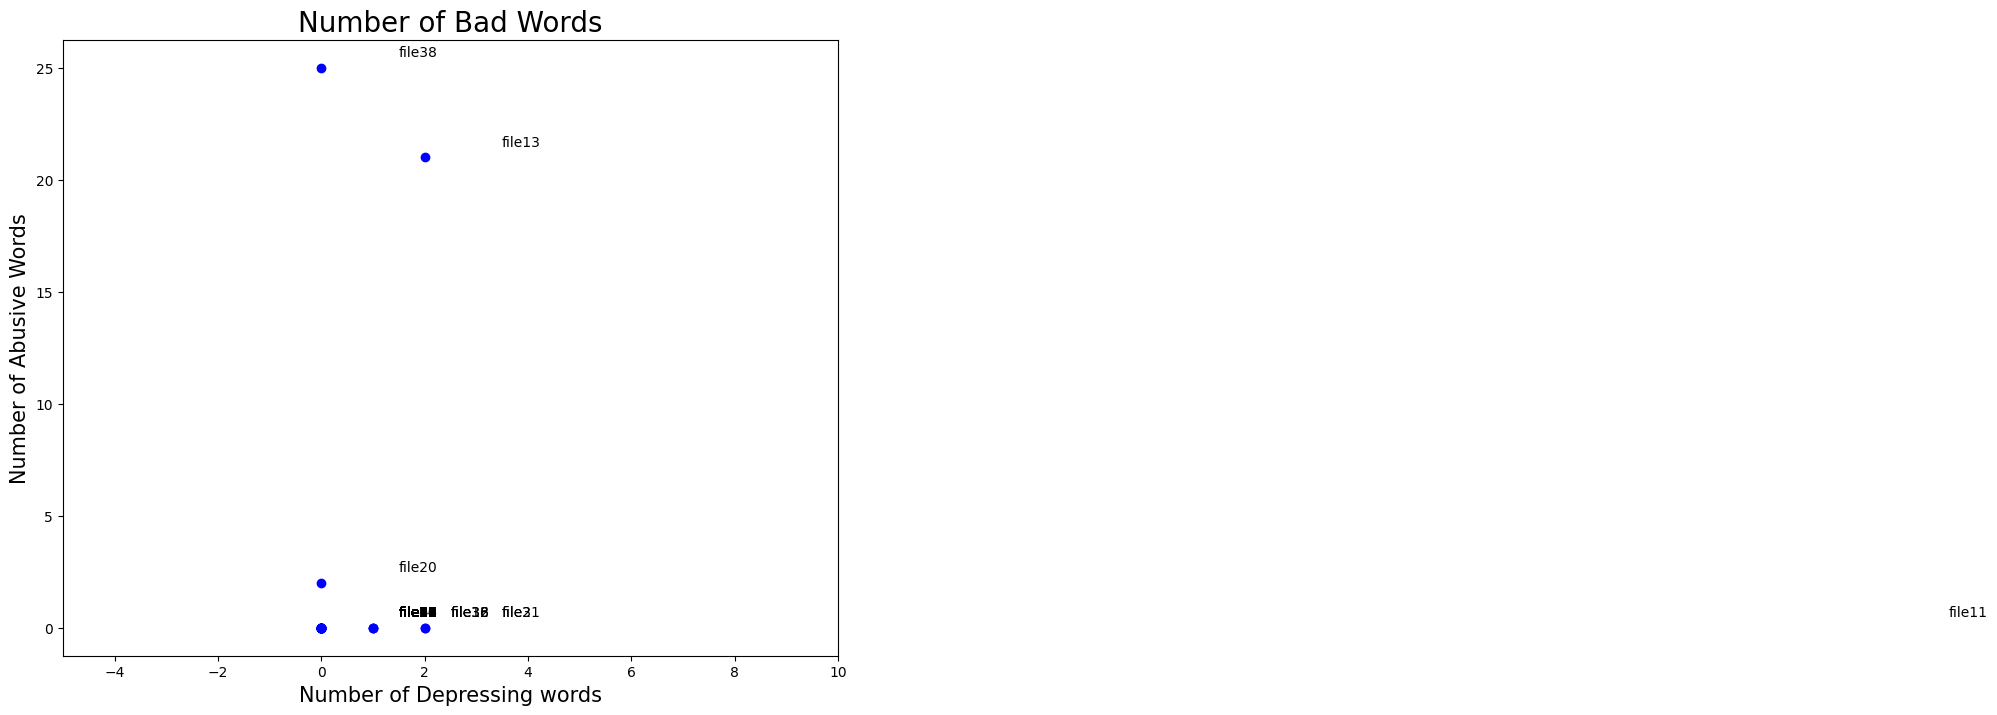

In [137]:
import matplotlib.pyplot as plt

# Assuming data_profanity.index contains the file names or identifiers
full_names = data_profanity.index.tolist()

plt.rcParams['figure.figsize'] = [10, 8]

for i, file in enumerate(data_profanity.index):
    x = data_profanity.Depressing_word.loc[file]
    y = data_profanity.Abusive_word.loc[file]
    plt.scatter(x, y, color='blue')
    # Add jitter to text positions to prevent overlap
    plt.text(x + 1.5, y + 0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 10)

plt.title('Number of Bad Words', fontsize=20)
plt.xlabel('Number of Depressing words', fontsize=15)
plt.ylabel('Number of Abusive Words', fontsize=15)

plt.show()


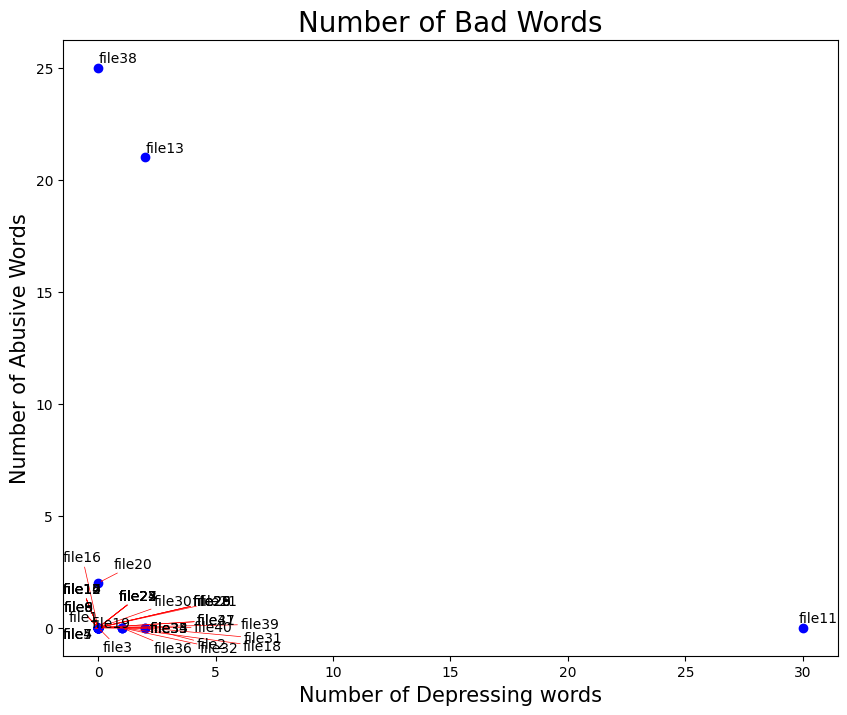

In [138]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Assuming data_profanity.index contains the file names or identifiers
full_names = data_profanity.index.tolist()

plt.rcParams['figure.figsize'] = [10, 8]

for i, file in enumerate(data_profanity.index):
    x = data_profanity.Depressing_word.loc[file]
    y = data_profanity.Abusive_word.loc[file]
    plt.scatter(x, y, color='blue')

plt.title('Number of Bad Words', fontsize=20)
plt.xlabel('Number of Depressing words', fontsize=15)
plt.ylabel('Number of Abusive Words', fontsize=15)

# Adjust text labels to prevent overlap
texts = [plt.text(x, y, name, fontsize=10) for x, y, name in zip(data_profanity.Depressing_word, data_profanity.Abusive_word, full_names)]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()


### Write findings. 
* No of Abusive are lesser in files except file 38 and 13
* No of Abusive words are highest in file 13 and file 38.
* No of depressing words are higher in file 11, 13, 31.